In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def log_series(series):
    tmp = np.log(series)
    return pd.Series(tmp, series.index)

In [3]:
def diff_series(series, periods = 1):
    return series.diff(periods = periods)

In [4]:
def plot_series(series, x_label, y_label, title):
    plt.figure(figsize = (10, 6))
    plt.plot(series, color = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [8]:
h02 = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.3/h02.csv')
print(h02.shape)
h02.head()

(204, 2)


,Unnamed: 0,x
0,1,0.429795
1,2,0.400906
2,3,0.432159
3,4,0.492543
4,5,0.502369


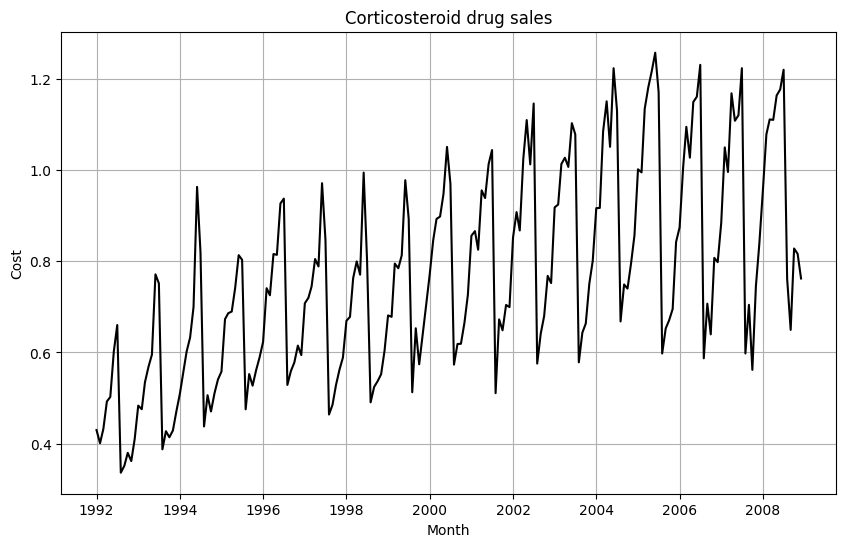

In [9]:
h02 = pd.Series(list(h02.x), pd.date_range(start='1/1/1992', periods=h02.shape[0], freq='1MS'))
plot_series(h02, "Month", "Cost", "Corticosteroid drug sales")

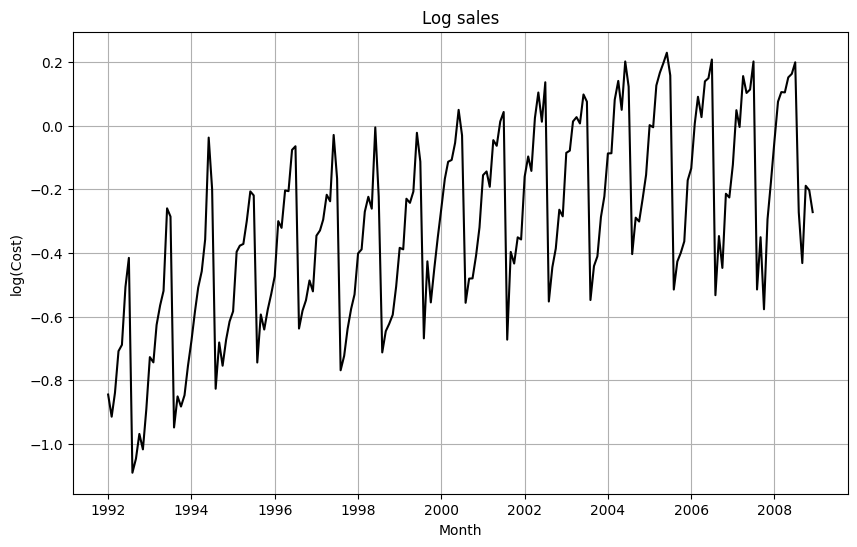

In [10]:
log_h02 = log_series(h02)

plot_series(log_h02, "Month", "log(Cost)", "Log sales")

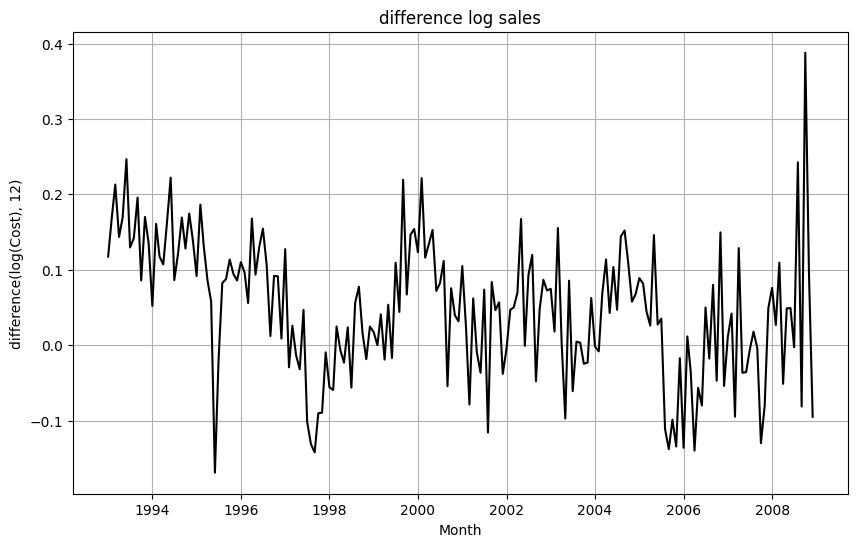

In [11]:
diffl2_h02 = diff_series(log_h02, 12)
plot_series(diffl2_h02, "Month", "difference(log(Cost), 12)", "difference log sales")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('daily-total-female-births-CA.csv')
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [16]:
timestamp = df.births

# 1. 단순 이동 평균(Simple Moving Average, SMA)
- list = [a0, a1, a2, a3, a4, a5]
- window = 3
- ==> [avg([a0, a1, a2]), avg([a1, a2, a3]), avg([a2, a3, a4]), avg([a3, a4, a5])]

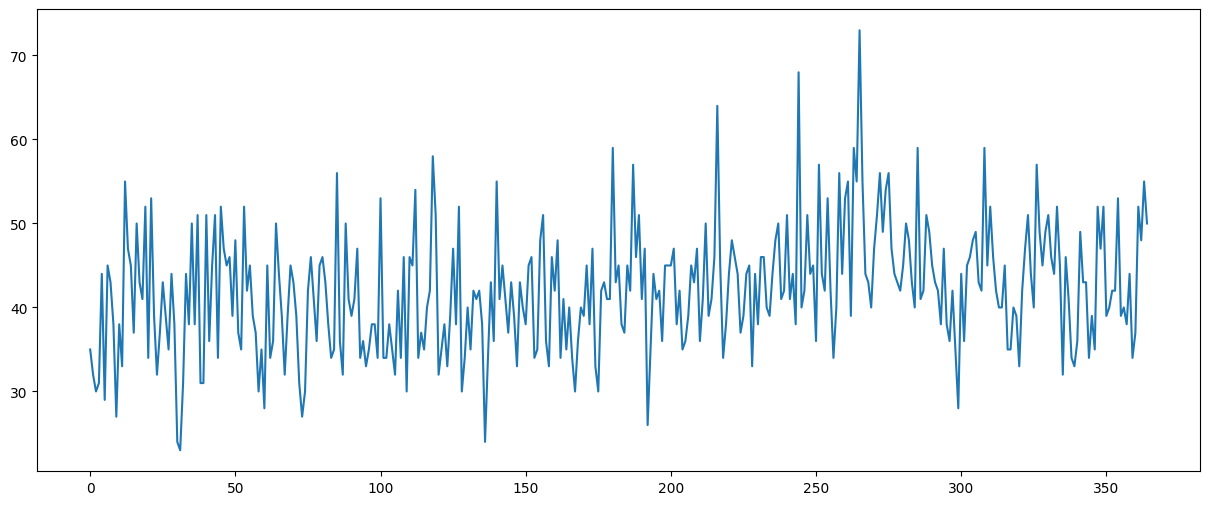

In [15]:
df.births.plot(figsize=(15,6))
plt.show()

In [17]:
def SMA(array, window):
    array = np.array(array)
    assert array.ndim == 1, "1차원 array만 입력할 수 있습니다."
    n = len(array)
    result = np.empty(n)
    result[:] = np.nan

    ma = []
    for i in range(0, n-window+1):
        m = np.mean(array[i:i+window])
        ma.append(m)

    result[window-1:] = ma
    return np.array(result)
    

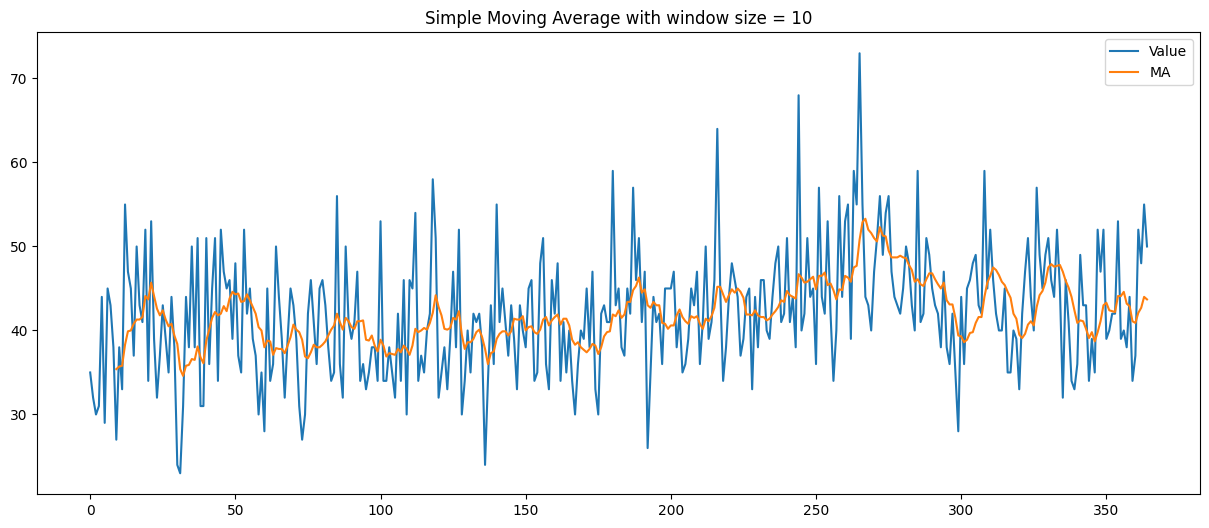

In [18]:
window = 10
sma = SMA(timestamp, window)

timestamp.plot(figsize = (15, 6))
plt.plot(sma)
plt.legend(['Value', 'MA'])
plt.title('Simple Moving Average with window size = {}'.format(window))
plt.show()

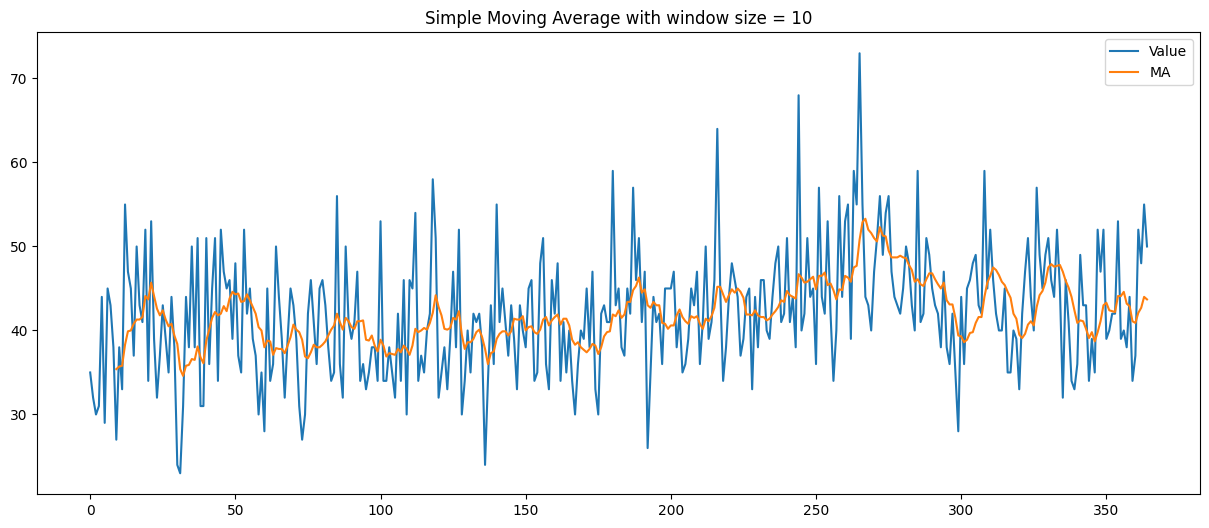

In [19]:
window = 10
sma = SMA(timestamp, window)

timestamp.plot(figsize=(15,6))
plt.plot(sma)
plt.legend(['Value', 'MA'])
plt.title('Simple Moving Average with window size = {}'.format(window))
plt.show()

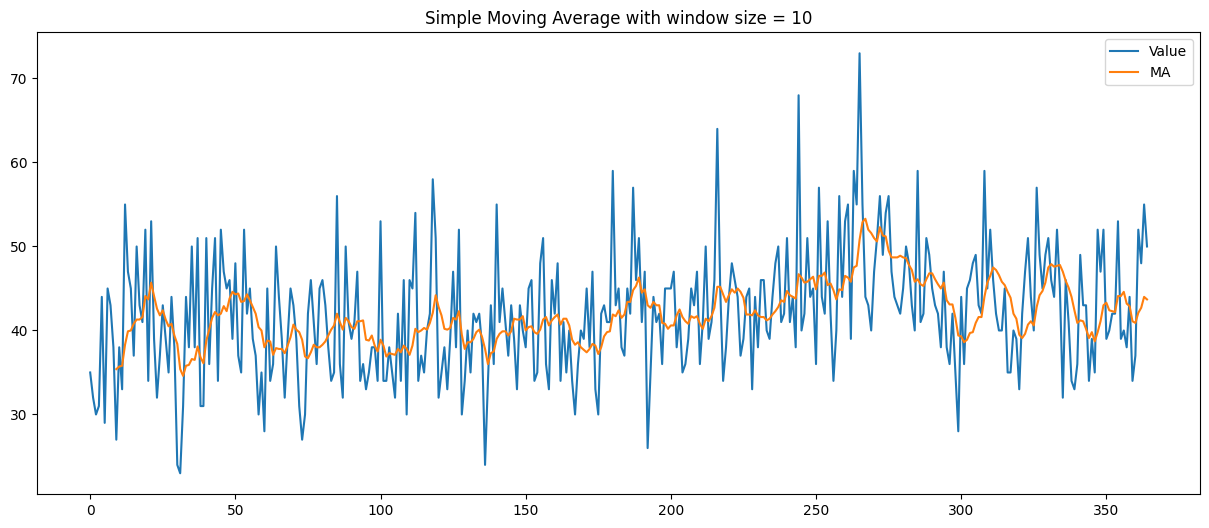

In [20]:
timestamp.plot(figsize = (15, 6))
timestamp.rolling(window = window).mean().plot()
plt.legend(['Value', 'MA'])
plt.title('Simple Moving Average with window size = {}'.format(window))
plt.show()

### 누적이동평균 (CMA), 가중 이동평균 (WMA)

In [23]:
!pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 21.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 57.2 MB/s eta 0:00:00
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=8d8d8eb2fad4fa6ffaba3c3cf5943ec1a

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')
COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, SimpleExpSmoothing, Holt)

<Figure size 640x480 with 0 Axes>

In [28]:
df = yf.download('AAPL', start = '2023-01-01', end = '2023-12-31', progress = False)
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636292,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [36]:
moving_average = df['Close'].rolling(window=5).mean()
moving_average

Ticker,AAPL
Date,
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,NaN
2023-01-09,127.243997
...,...
2023-12-22,195.188000
2023-12-26,194.620001
2023-12-27,193.862000


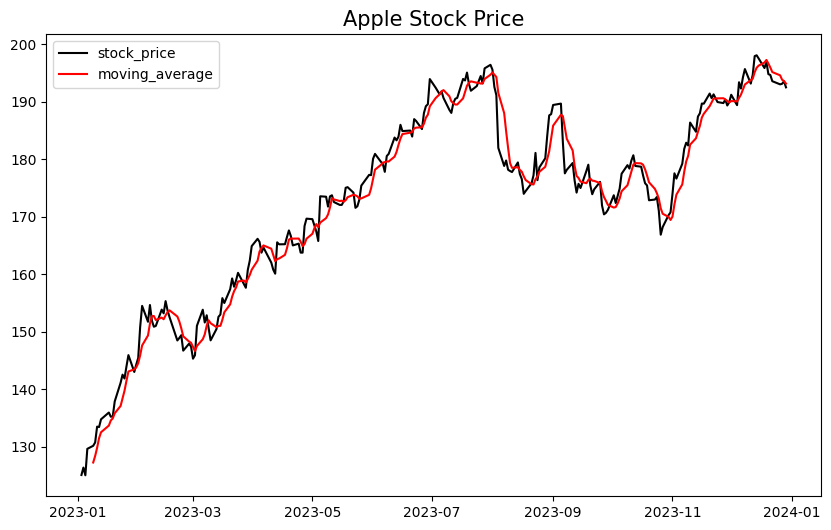

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
fig.set_facecolor('white')
plt.plot(df.index, df.Close, color = 'black', label = 'stock_price')
plt.plot(moving_average.index, moving_average, color = 'red', label = 'moving_average')
plt.legend()
plt.title('Apple Stock Price', fontsize = 15)
plt.show()

In [39]:
import pandas as pd
import numpy as np

data = {'A' : [1, 2, np.nan, 4, 5],
       'B' : [5, np.nan, np.nan, 8, 9],
       'C' : [9, 10, 11, 12, 13]}

df = pd.DataFrame(data)
df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,NaN,11
3,4.0,8.0,12
4,5.0,9.0,13


In [40]:
df_interpolated = df.interpolate()
df_interpolated

,A,B,C
0,1.0,5.0,9
1,2.0,6.0,10
2,3.0,7.0,11
3,4.0,8.0,12
4,5.0,9.0,13


In [41]:
df_interpolated = df.interpolate(method = 'polynomial', order = 2)
df_interpolated

,A,B,C
0,1.0,5.0,9
1,2.0,6.0,10
2,3.0,7.0,11
3,4.0,8.0,12
4,5.0,9.0,13
